# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = merged_df.loc[merged_df["Mouse ID"] != duplicate_id[0]]
mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumour_avg  = mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumour_med  = mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumour_var  = mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumour_std  = mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumour_stderr  = mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
calc_df = pd.DataFrame({
            "Mean Tumor Volume" : tumour_avg,
            "Median Tumor Volume" : tumour_med,
            "Tumor Volume Variance" : tumour_var,
            "Tumor Volume Std. Dev." : tumour_std,
            "Tumor Volume Std. Err." : tumour_stderr
    
})
calc_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
calc_df = mice_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

## Bar and Pie Charts

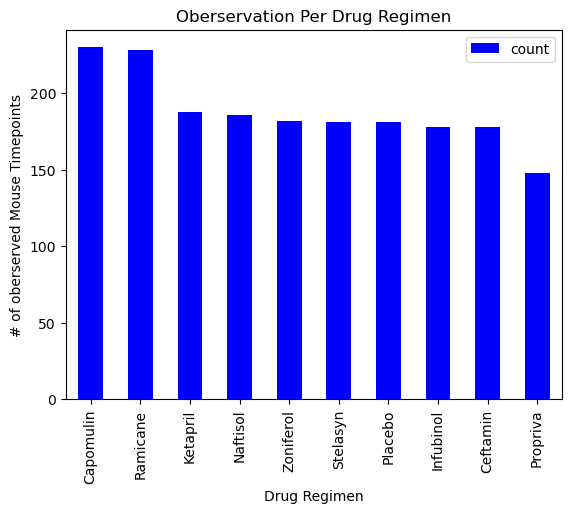

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
chart_df = pd.DataFrame(mice_df["Drug Regimen"].value_counts())
chart_df.plot(kind = "bar", facecolor = 'b')
plt.ylabel("# of oberserved Mouse Timepoints")
plt.title("Oberservation Per Drug Regimen")

plt.show()

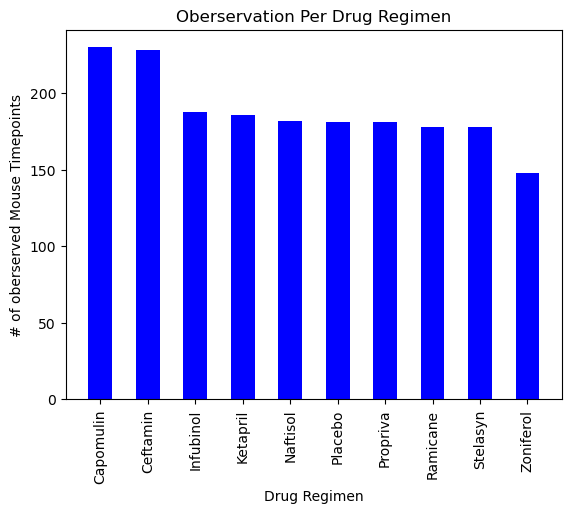

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = mice_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(calc_df))
plt.xticks(x_axis, calc_df.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of oberserved Mouse Timepoints")
plt.title("Oberservation Per Drug Regimen")
plt.bar(x_axis, y_axis, facecolor = "b", width = 0.5)
plt.show()

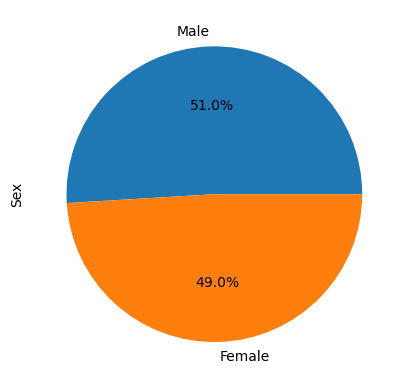

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = mice_df["Sex"].value_counts()
pie_df.plot(kind = "pie", y = pie_df, autopct = "%1.1f%%", ylabel = "Sex")
plt.show()

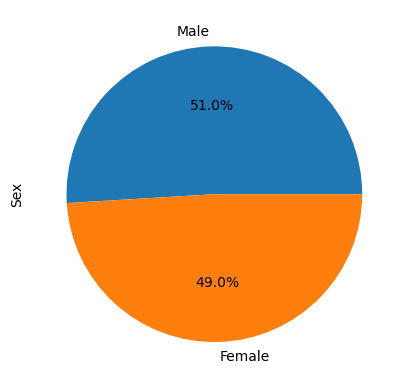

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df, labels = pie_df.index, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = mice_df.groupby ("Mouse ID")[["Timepoint"]].max()
grouped_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = pd.merge(mice_df, grouped_df, how = "right", on = ["Mouse ID", "Timepoint"])
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [79]:
# Put treatments into a list for for Loop (and Later for plot Labels) 
labels= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumour_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in labels:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumour_volume = combined_df.loc[combined_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumour_vol_data.append(tumour_volume)
    
#     # Determine outliers using upper and Lower bounds 
    quartiles = tumour_volume.quantile([.25 , .50, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr =  upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumour_volume.loc[(tumour_volume < lower_bound) | (tumour_volume > upper_bound)]
    
    print (f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


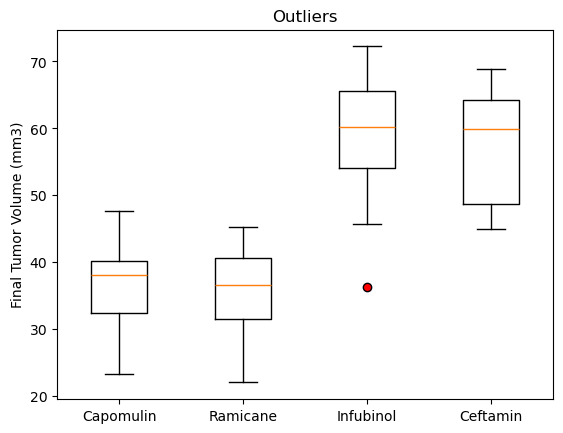

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumour_vol_data, flierprops = dict(markerfacecolor = "r", marker = 'o'))
ax1.set_title("Outliers")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticks([1,2,3,4], labels)
plt.show()

## Line and Scatter Plots

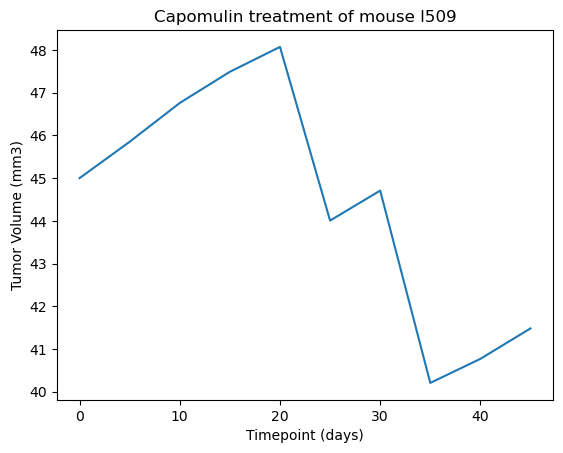

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


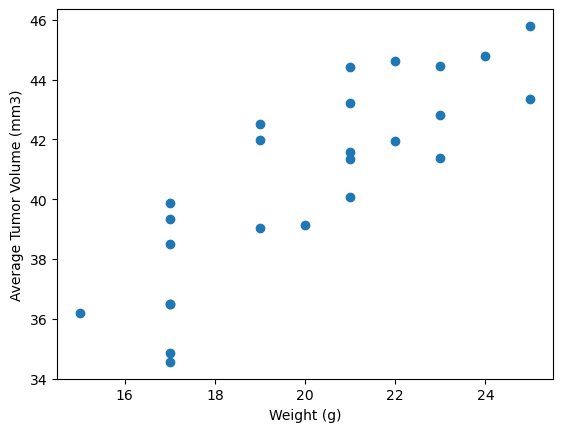

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


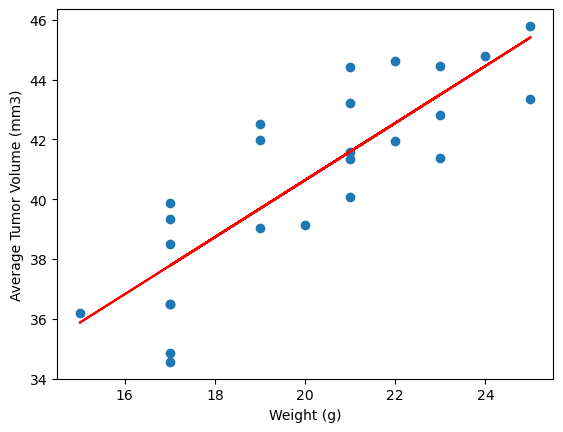

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
